# Экспресс-путь к классификации изображений

В этой записной книжке мы покажем, как запускать программное обеспечение для классификации, аналогичное тому, как работают изображения Google.

Юлия позволяет нам загружать различные предварительно обученные модели для классификации изображений через пакет `Metalhead.jl`.

In [ ]:
]add Metalhead

In [ ]:
using Metalhead, Images  # To run type <shift> + enter
using Metalhead: classify

Давайте загрузим изображение слона (можете указать свой путь - у меня проблемы из-за имени юзера на русском):

In [ ]:
download("http://www.mikebirkhead.com/images/EyeForAnElephant.jpg", "D://Science//elephant.jpg")

In [ ]:
image = load("D://Science//elephant.jpg") # open up a new cell type ESC + b (for below)

Мы будем использовать модель VGG19, которая представляет собой глубокую сверточную нейронную сеть, обученную на подмножестве базы данных ImageNet. Поскольку это ваш первый блокнот, очень вероятно, что слова «сверточный», «нейронная сеть» и «глубокий» могут показаться загадочными. В ходе этого курса мы развеем этитайны.

In [ ]:
vgg = VGG19() # нехило так грузится ...прошло уже две минуты - наверно модель крута

 Здесь мы будем отображать слои:

In [ ]:
for i=1:28
  println(vgg.layers[i])
end

Чтобы классифицировать изображение с помощью модели, мы просто запускаем следующую команду, и она возвращает наилучшее предположение при классификации:

In [ ]:
image

In [ ]:
classify(vgg, image)

Упражнение 1: возьмите любимое изображение, а затем классифицируйте его. Расскажите нам, что вы получили!

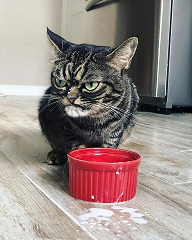

In [26]:
image = load("D://Science//ct.jpg")

In [27]:
classify(vgg, image)

"tabby, tabby cat"

Мы можем сделать то же самое с любым изображением, которое у нас есть, например, с собакой Алана, Филиппом:

In [ ]:
image = load("data/philip.jpg")

In [ ]:
classify(vgg, image)

## Что здесь происходит?

VGG19 классифицирует изображения в соответствии со следующими 1000 различными классами:


In [ ]:
Metalhead.imagenet_classes[rand(1:1000,1,1)]

Модель представляет собой сверточную нейронную сеть (CNN), состоящую из последовательности слоев 'нейронов'. Ранее было изучено огромное количество параметров, составляющих эти взаимосвязи, чтобы правильно предсказать набор обучающих образов, представляющих каждый класс.

Запуск модели на изображении выдаст вероятности пренадлежности к каждому классу

In [ ]:
probs = Metalhead.forward(vgg, image)

Теперь мы можем увидеть, какие из них наиболее вероятны:

In [ ]:
perm = sortperm(probs)
probs[273]

In [ ]:
[ Metalhead.imagenet_classes(vgg)[perm] probs[perm] ][end:-1:end-10, :]

## Что нужно, чтобы получить успешный классификатор с помощью машинного обучения?

Ключевые вопросы для получения успешного классификатора в машинном обучении: 

- Как мы определяем подходящую модель, которая может адекватно моделировать данные? 

- Как мы обучаем её соответствующим данным?

Вот вопросы, на ответ которых рассчитан этот курс.